This assignment will help you understand logistic regression.
### Problem Statement 

    Use scikit learn’s LogisticRegression class to model and make predictions on the following two datasets: 
    1)  https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset 
        Using the model, make predictions of the demand for bikes when the windspeed is minimum and maximum. 
        Plot the ROC curve. 
    2) MNIST Dataset Use from sklearn.datasets import fetch_mldata


#### =========================================
### Dataset characteristics
#### =========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_mldata
#dta = sm.datasets.fair.load_pandas().data

In [2]:
bike_data = pd.read_csv('hour.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
bike_data.groupby('windspeed').mean()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
windspeed,,,,,,,,,,,,,,,
0.0000,9135.342202,2.744037,0.492202,7.281651,10.050917,0.031651,2.992661,0.695872,1.368807,0.489624,0.481367,0.682312,29.054128,131.589450,160.643578
0.0896,8947.700351,2.602807,0.500351,6.917193,10.254737,0.032281,3.007719,0.691930,1.419649,0.483467,0.470881,0.703053,25.988070,124.049825,150.037895
0.1045,9114.723562,2.621521,0.521954,6.904762,10.591837,0.027211,2.909091,0.683983,1.429808,0.494236,0.477512,0.691156,28.324057,137.922696,166.246753
0.1343,8842.508631,2.518412,0.514384,6.612198,10.848677,0.021864,2.992520,0.686997,1.422325,0.500840,0.480035,0.669850,31.747411,144.560414,176.307825
0.1642,8968.974631,2.559882,0.520354,6.701475,11.887316,0.028909,3.019469,0.663127,1.451917,0.507304,0.484940,0.640802,35.838938,160.620059,196.458997
0.1940,8793.806880,2.513579,0.519010,6.473748,11.843090,0.022330,3.084490,0.686180,1.433917,0.509982,0.486893,0.626946,37.592637,163.015088,200.607725
0.2239,8458.653668,2.512227,0.485790,6.417052,12.286847,0.025116,2.894250,0.691342,1.430271,0.516801,0.490870,0.607270,41.294118,170.654329,211.948447
0.2537,8691.470270,2.473359,0.516602,6.370656,12.408494,0.033205,3.071042,0.661776,1.447104,0.514548,0.488581,0.597413,43.318147,170.488803,213.806950
0.2836,8207.089695,2.400763,0.477099,6.182252,11.995229,0.027672,3.008588,0.682252,1.398855,0.507729,0.480929,0.572968,44.855916,170.680344,215.536260


In [5]:
%matplotlib inline

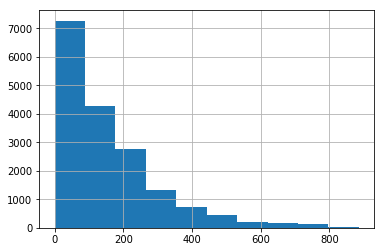

In [6]:
bike_data.registered.hist()


In [7]:
bike_data.windspeed.max()

0.8507

In [8]:
#from sklearn.feature_extraction import DictVectorizer
#dict_one_hot_encoder = DictVectorizer(sparse=False)


In [9]:
#data prep
#create intercept column and dummy var
y, X = dmatrices('windspeed ~ season + yr + holiday + workingday + weathersit + temp + atemp + hum + registered + C(mnth) + C(hr) + C(weekday)', bike_data, return_type = 'dataframe')
X.columns

Index(['Intercept', 'C(mnth)[T.2]', 'C(mnth)[T.3]', 'C(mnth)[T.4]',
       'C(mnth)[T.5]', 'C(mnth)[T.6]', 'C(mnth)[T.7]', 'C(mnth)[T.8]',
       'C(mnth)[T.9]', 'C(mnth)[T.10]', 'C(mnth)[T.11]', 'C(mnth)[T.12]',
       'C(hr)[T.1]', 'C(hr)[T.2]', 'C(hr)[T.3]', 'C(hr)[T.4]', 'C(hr)[T.5]',
       'C(hr)[T.6]', 'C(hr)[T.7]', 'C(hr)[T.8]', 'C(hr)[T.9]', 'C(hr)[T.10]',
       'C(hr)[T.11]', 'C(hr)[T.12]', 'C(hr)[T.13]', 'C(hr)[T.14]',
       'C(hr)[T.15]', 'C(hr)[T.16]', 'C(hr)[T.17]', 'C(hr)[T.18]',
       'C(hr)[T.19]', 'C(hr)[T.20]', 'C(hr)[T.21]', 'C(hr)[T.22]',
       'C(hr)[T.23]', 'C(weekday)[T.1]', 'C(weekday)[T.2]', 'C(weekday)[T.3]',
       'C(weekday)[T.4]', 'C(weekday)[T.5]', 'C(weekday)[T.6]', 'season', 'yr',
       'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'registered'],
      dtype='object')

In [10]:
#flatten y into a 1-D array
y = np.ravel(y)
#y = y.min()
#y

In [11]:
#initiate a model, fix X and y
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model = model.fit(X,y)

#check accuracy on the training set
model.score(X,y)

ValueError: Unknown label type: 'continuous'